# Presented By: Pradip Shrestha, NIAID 07/26/23
## Singluar Value Decomposition (SVD) and Image Compression
SVD is a factorization of the matrix into three different matrices. 

* Low rank matrix approximation.
* Dimension reduction.
* Useful to factorize mxn matrix. Diagnolization, and QR decomposition works only for square matrix. 
* Usage in image compression, page ranking, PCA.

## Mathematics
Any matrix A (mxn) can be represented as a product of rotation, scaling, and rotation.
A = U Σ V<sup>T</sup>

U = mxm orthogonal matrix

Σ = mxn diagonal matrix

V = nxn orthogonal matrix

![SVD Methods](svd-method.png)


In [1]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
import numpy as np
import cv2

(843, 1389, 3)


(843, 1389)

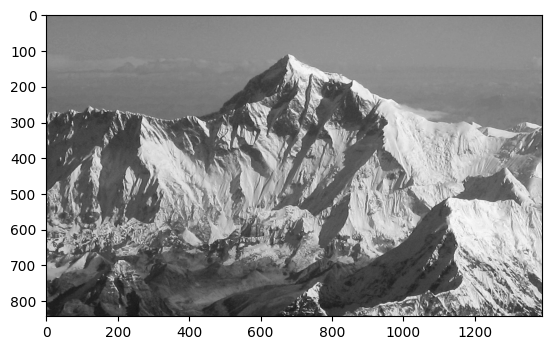

In [2]:
file_name = 'data/mt-everest.jpg'
img = imread(file_name)
np_img = np.array(img)
print(np_img.shape)
np_img = cv2.cvtColor(np_img, cv2.COLOR_BGR2GRAY)
plt.imsave('uncompressed.jpeg', np_img)
plt.imshow(np_img, cmap='gray', vmin=0, vmax=255)
np_img.shape


In [14]:
U, S, VT = np.linalg.svd(np_img, full_matrices=False)
S = np.diag(S)
diag_values = np.diagonal(S)
# singular values in descending order
print(diag_values[:5], diag_values[-1])

[144311.66695501  21249.00080527  16784.49062855  12340.79181306
  11469.79969561] 5.327155689182726


In [4]:
def svd_approximation(a_s = 1):
    img_approx = U[:, :a_s] @ S[:a_s, :a_s] @ VT[:a_s, :]
    plt.imshow(img_approx, cmap='gray', vmin=0, vmax=255)
    compressed_file_name =  str(a_s) + '-compressed.jpeg'
    plt.imsave(compressed_file_name, img_approx)

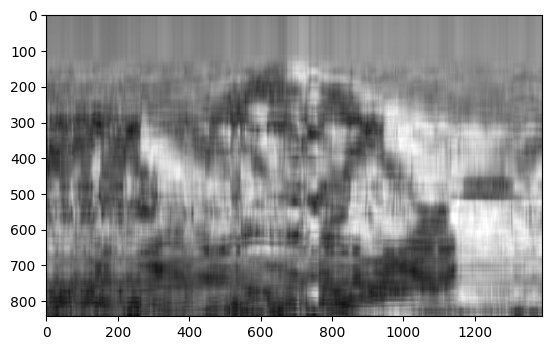

In [7]:
svd_approximation(10)

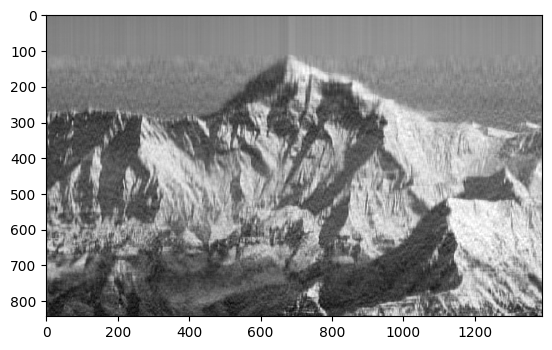

In [6]:
svd_approximation(50)

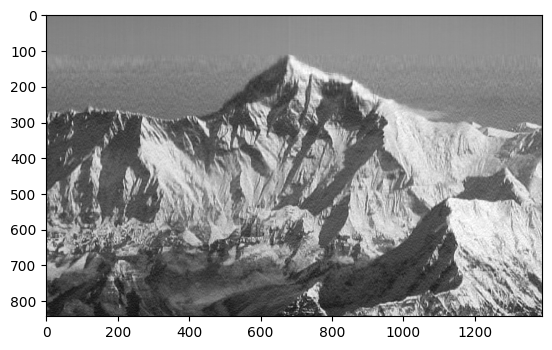

In [8]:
svd_approximation(100)